# How-to: run circuit on Braket devices

In [ ]:
from qiskit import transpile
from qiskit.circuit.random import random_circuit
from qiskit.visualization import plot_histogram

from qiskit_braket_plugin import AWSBraketProvider

Let's create random circuit

In [12]:
circuit = random_circuit(5, 3, seed=42)
circuit.draw()

┌───┐
q_0: ─────X────────────■───────────────────────────┤ X ├
          │            │      ┌─────┐┌────────────┐└─┬─┘
q_1: ─────X────────────┼──────┤ Sdg ├┤ Rx(3.9689) ├──┼──
     ┌──────────┐      │      └─────┘└────────────┘  │  
q_2: ┤ U1(6.13) ├──────┼─────────X───────────────────■──
     └──┬───┬───┘┌─────┴─────┐   │       ┌───┐       │  
q_3: ───┤ T ├────┤ Rz(5.823) ├───┼───────┤ S ├───────┼──
       ┌┴───┴┐   └───────────┘   │       └───┘       │  
q_4: ──┤ Tdg ├───────────────────X───────────────────■──
       └─────┘

Get statevector simulator

In [9]:
provider = AWSBraketProvider()
state_vector_simulator_backend = provider.get_backend("SV1")
state_vector_simulator_backend

BraketBackend[SV1]

Transpile circuit against given backend

In [24]:
transpiled_circuit = transpile(
    circuit,
    backend=state_vector_simulator_backend,
    seed_transpiler=42
)
transpiled_circuit.draw(idle_wires=False, fold=-1)

global phase: 4.8274
                                                                          ┌───┐┌───┐┌─────┐┌───┐┌───┐┌───┐┌─────┐┌───┐┌───┐ ┌───┐      
q_0 -> 0 ───────────X────────────────────■─────────────────────────────■──┤ H ├┤ X ├┤ Tdg ├┤ X ├┤ T ├┤ X ├┤ Tdg ├┤ X ├┤ T ├─┤ H ├──────
                    │           ┌─────┐  │        ┌────────────┐       │  └───┘└─┬─┘└─────┘└─┬─┘└───┘└─┬─┘└─────┘└─┬─┘└───┘ └───┘      
q_1 -> 1 ───────────X───────────┤ Sdg ├──┼────────┤ Rx(3.9689) ├───────┼─────────┼───────────┼─────────┼───────────┼───────────────────
         ┌─────────────────────┐└─────┘  │        └────────────┘       │         │           │         │           │        ┌───┐      
q_2 -> 2 ┤ P(6.13001602516006) ├───X─────┼─────────────────────────────┼─────────┼───────────■─────────┼───────────■────■───┤ T ├───■──
         └────┬────────────┬───┘   │   ┌─┴─┐┌───────────────────────┐┌─┴─┐┌───┐  │                     │                │   └───┘   │  
q_3 -> 3 ─────┤ P(-2.5863) ├───────┼───┤ X ├┤ Rz(-2.91151808057099) ├┤ X ├┤ S ├──┼─────────────────────┼────────────────┼───────────┼──
              └──┬─────┬───┘       │   └───┘└───────────────────────┘└───┘└───┘  │                     │   ┌───┐      ┌─┴─┐┌─────┐┌─┴─┐
q_4 -> 4 ────────┤ Tdg ├───────────X─────────────────────────────────────────────■─────────────────────■───┤ T ├──────┤ X ├┤ Tdg ├┤ X ├
                 └─────┘                                                                                   └───┘      └───┘└─────┘└───┘

Run circuit

In [14]:
result = state_vector_simulator_backend.run(transpiled_circuit, shots=10)

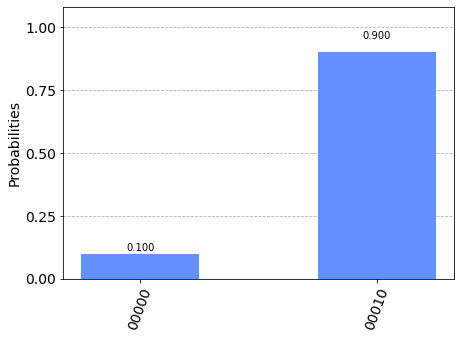

In [20]:
plot_histogram(result.result().get_counts())